# TP1 Un premier exemple d'apprentissage


### Table of Contents

* [1. Par régression linéaire](#chapter1)
* [2. Par régression polynomiale](#chapter2)
   * [2.1 `PolynomialFeatures` pour les features de dimension 2](#section2_1)

Dans les prochains exercices, les données qu'on va étudier sont 

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(98)
size=100
x = np.sort(np.random.uniform(-5, 5, size))
X = x.reshape(-1, 1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 2, size)

**Exercice 1** : Exécuter la prochaine cellule. Constater la forme de données. 

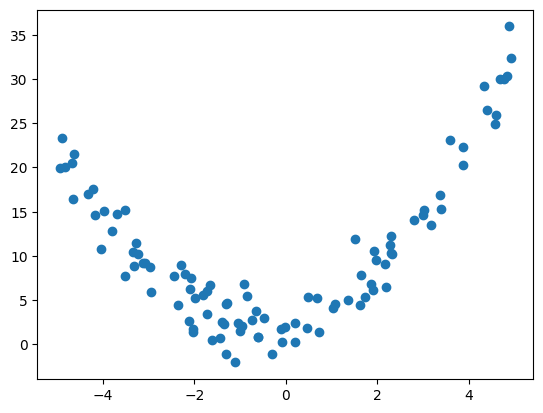

In [32]:
plt.scatter(x, y)
plt.show()

Le but des prochains exercices sont d'*apprendre* une relation entre $X$ et $y$, c-à-d, on va chercher un modèle $\hat{f}$ telle que $\hat{y}:=\hat{f}(X)$ soit proche de $y$ dans le sens de perte quadratique.

**Exercice 1** : 
1. Quelle variable est le *feature/input/covariable*? 
2. Quelle variable est la *variable dépendante/label/outcome/target*? 
3. Quelle sont la dimension de $X$? Combien d'échantillons qu'on a? 


Réponse pour exercice 1 :

1.X

2.Y

3.1, 100


## 1. Exemple d'apprentissage par régression linéaire <a class="anchor" id="chapter1"></a>



On va d'abord utiliser la régression linéaire pour modéliser la relation entre $X$ et $y$. C'est à dire on cherche $a$ et $b$ telle que $\hat{f}(x)=a\cdot x+b$ soit proche de $y$ dans le sens de perte quadratique.

On va utliser le package `sklearn.linear_model.LinearRegression`. 

(Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) <-- Lisez bien l'exemple de cette page

**Exercice 2** : Définir un modèle de régression linéaire, nommé par `lin_reg`.

In [33]:
# Réponse pour l'exercice 2
from sklearn import datasets, linear_model

lin_reg = linear_model.LinearRegression()

**Exercice 3** : Entraîner le modèle de régression linéaire `lin_reg` sur $X$, y. Si l'apprentissage est réussie, `lin_reg` stockera le modèle.

In [34]:
# Réponse pour l'exercice 3

lin_reg.fit(X, y)




LinearRegression()

**Exercice 4** : 

(1) Tracer le modèle linéaire qu'on a entraîné. Hint: on pourra utliser `lin_reg.predict`. 

(2) Prédire la valeur de $y$ pour un nouveau x=1 en utilisant le modèle `lin_reg`.

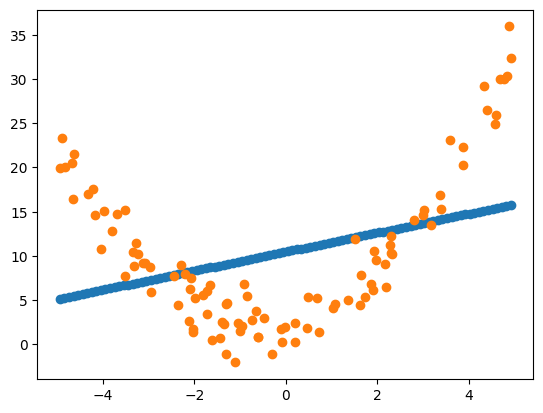

In [35]:
# Réponse pour l'exercice 4
import numpy as np

x2 = np.linspace(x[0], x[99], 100)
X2 = x2.reshape(-1,1)
y2 = lin_reg.predict(X2)
plt.scatter(x2, y2)
plt.scatter(x, y)
plt.show()

**Exercice 5** : Quels sont les coefficients $a$ et $b$ qu'on a trouvé par  `lin_reg`? 

In [36]:
# Réponse pour l'exercice 5
print(lin_reg.intercept_)
print(lin_reg.coef_)

10.46919217181134
[1.07377036]


**Exercice 6** : Calculer l'erreur quadratique de `lin_reg` sur les données par $e=\sum_{i=1}^{100}(y_i-\hat{y}_i)^2$.

6485.603458412155


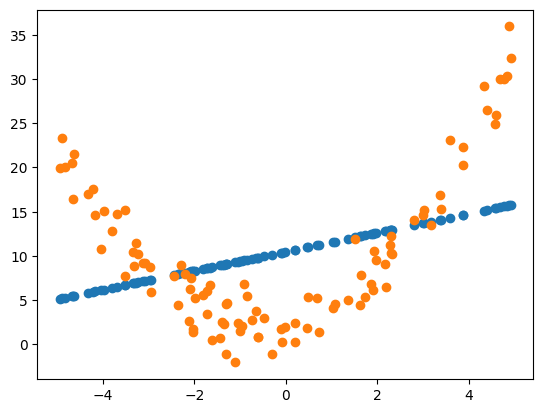

In [37]:
# Réponse pour l'exercice 6
y_hat = lin_reg.predict(X)
plt.scatter(x, y_hat)
plt.scatter(x, y)

e = 0
for i in range(0, 100):
    e += (y[i]-y_hat[i])**2
#e /= 100

print(e)


**Exercice 7** : Décrire le fonctionnement de la prochaine ligne. hint: chercher dans la page  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

In [38]:
lin_reg.score(X, y)

0.12283275727478393

 Réponse pour l'exercice 7: 
 the program outputs the coefficient of determination

**Exercice 8** : Quel est le fonctionnement de `X = x.reshape(-1, 1)`? Dans quelle condition doit-on utiliser $-1$ dans reshape? Si on entraînne le modèle sans passer par cette étaple, qu'est-ce qui va se passer? Essayons `lin_reg.fit(x,y)` .


In [39]:
#lin_reg.fit(x,y)

# Réponse pour l'exercice 8
# The function X = x.reshape(-1, 1) reshapes 1-D array of size 100 to 2-D array of size 100x1. 
# If we use -1 as a parameter, then this parameter is calculated from the size of x. In this case it is 100.
# x.reshape(-1, 1) is similar to x.reshape(100, 1) in this case.
# We need to do this as lin_reg use 2-D array as an argument. If we do not do this there will be a runtime error.

## 2. Exemple d'apprentissage par régression polynomiale <a class="anchor" id="chapter2"></a>


Maintenant passons à la régression polynomiale de degré 2 pour modéliser la relation entre $X$ et $y$. C'est à dire on cherche $a$, $b$ et $c$ telle que $\hat{f}(x)=a\cdot x^{2}+b\cdot x +c$ soit proche de $y$ dans le sens de perte quadratique.

C'est à dire qu'on a ajouter un feature/une covariable $x^2$ puis faire la régression linéaire sur la nouvelle covariable $X=(x^2, x)$

**Exercice 9** : Créer une nouvelle `X2` de dimension 100$\times$2 donc la première colonne est $x^2$, la deuxème colonne est $x$.

In [40]:
# Réponse pour l'exercice 9
X2 = np.vstack((x*x, x)).T

**Exercice 10** : Entraîner un nouveau modèle, nommé par `poly2_reg`, pour la régression linéaire entre `X2` et `y` (qui est donc la régression polynomiale de degré 2 entre `X` et `y`).

In [41]:
# Réponse pour l'exercice 10
poly2_reg = linear_model.LinearRegression()
poly2_reg.fit(X2, y)

LinearRegression()

**Exercice 11** : 

(1) Tracer `poly2_reg` le modèle polynomial de degré 2 qu'on a entraîné. Hint: on pourra utliser `poly2_reg.predict`. 

(2) Prédire la valeur de $y$ pour un nouveau x=1 en utilisant le modèle `poly2_reg`.

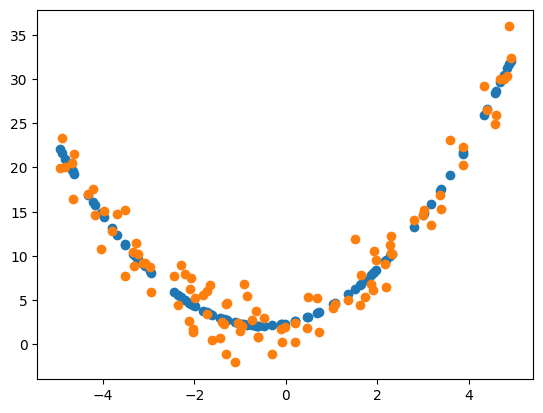

In [42]:
# Réponse pour l'exercice 11

#x2 = np.linspace(x[0], x[99], 100)
#X2 = np.vstack((x2*x2, x2)).T
y2 = poly2_reg.predict(X2)
#plt.scatter(x2, y2)
plt.scatter(x, y2)
plt.scatter(x, y)
plt.show()
#print ("La valeur de y pour x=1 est", poly2_reg.predict([[1,1]]))

**Exercice 12** : Quels sont les coefficients $a$, $b$, $c$ dans $\hat{f}(x)=a\cdot x^{2}+b\cdot x +c$?

In [50]:
# Réponse pour l'exercice 12
print("a = ", poly2_reg.coef_[1], ", b = ", poly2_reg.coef_[0], ", c = ", poly2_reg.intercept_, sep = '')

a = 1.0373003696104734, b = 1.014543934640809, c = 2.369512708851148


**Exercice 13** : Calculons l'erreur quadratique de `poly2_reg` sur les données. Comparez avec l'erreur de `lin_reg` de l'exercice 6.

In [44]:
# Réponse pour l'exercice 13

e = 0
for i in range(0, 100):
    e += (y[i]-y2[i])**2
#e /= 100

print(e)






448.17155345703645


Le passage $X\rightarrow [X^2, X]$ peut également être réalisé par `sklearn.preprocessing.PolynomialFeatures`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

(Attension l'ordre de `PolynomialFeatures` : $X\rightarrow [1, X, X^2]$ )

**Exercice 13** : Apprendre le prochain code, puis écire un modèle de régression polynomiale de degré 20. 

[[ 1.00000000e+00 -4.94574785e+00  2.44604218e+01]
 [ 1.00000000e+00 -4.89766478e+00  2.39871203e+01]
 [ 1.00000000e+00 -4.82315181e+00  2.32627934e+01]
 [ 1.00000000e+00 -4.68213193e+00  2.19223594e+01]
 [ 1.00000000e+00 -4.66261970e+00  2.17400225e+01]
 [ 1.00000000e+00 -4.62854669e+00  2.14234445e+01]
 [ 1.00000000e+00 -4.33401419e+00  1.87836790e+01]
 [ 1.00000000e+00 -4.21898392e+00  1.77998253e+01]
 [ 1.00000000e+00 -4.17449244e+00  1.74263872e+01]
 [ 1.00000000e+00 -4.05694942e+00  1.64588386e+01]
 [ 1.00000000e+00 -3.99098641e+00  1.59279725e+01]
 [ 1.00000000e+00 -3.81089813e+00  1.45229446e+01]
 [ 1.00000000e+00 -3.68922446e+00  1.36103771e+01]
 [ 1.00000000e+00 -3.52489613e+00  1.24248927e+01]
 [ 1.00000000e+00 -3.51043982e+00  1.23231877e+01]
 [ 1.00000000e+00 -3.34419539e+00  1.11836428e+01]
 [ 1.00000000e+00 -3.32917445e+00  1.10834025e+01]
 [ 1.00000000e+00 -3.27221720e+00  1.07074054e+01]
 [ 1.00000000e+00 -3.23654351e+00  1.04752139e+01]
 [ 1.00000000e+00 -3.12578308e+

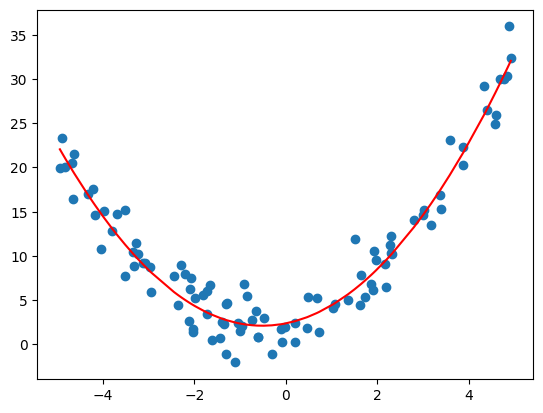

[0.         1.03730037 1.01454393] 2.369512708851148
Les coefficients obtenus sont a= 1.014543934640809 , b= 1.0373003696104741 and c= 2.369512708851148


In [82]:
# Procédure de X--> [1, X, X^2] par PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)    
poly2.fit(X)
X2_bis = poly2.transform(X)
print(X2_bis)


# Entraître le modèle de regression sur X2_bis et y
poly2_bis_reg = linear_model.LinearRegression()
poly2_bis_reg.fit(X2_bis, y)

# Tracer le modèle poly2_bis_reg
plt.scatter(x, y)
plt.plot(x, poly2_bis_reg.predict(X2_bis), color='r')
plt.show()

# Montrer les coefficient qu'on a trouvé (Attention à l'ordre de coefficient)
print (poly2_bis_reg.coef_, poly2_bis_reg.intercept_)
print ("Les coefficients obtenus sont a=",poly2_bis_reg.coef_[2],", b=",poly2_bis_reg.coef_[1],"and c=", poly2_bis_reg.intercept_ )

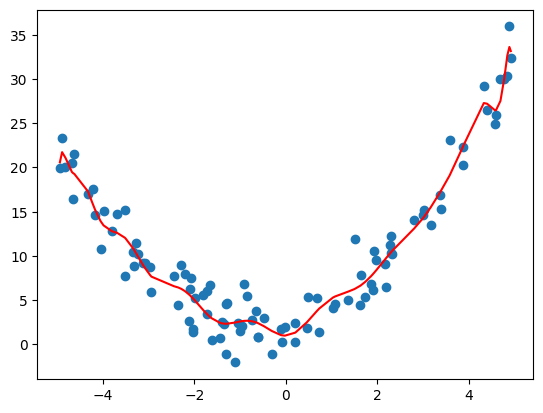

[ 0.00000000e+00  1.28944985e-01  7.31687486e+00  2.29980509e+00
 -7.08377279e+00 -1.48744918e+00  3.44206544e+00  4.21524755e-01
 -8.83902035e-01 -6.32469606e-02  1.32957586e-01  5.42026376e-03
 -1.23186935e-02 -2.69742403e-04  7.11812807e-04  7.50812903e-06
 -2.49829260e-05 -1.03038601e-07  4.87083769e-07  4.74889836e-10
 -4.04448169e-09] 0.9783633678998971


In [71]:
# Réponse pour l'exercice 13

# Procédure de X--> [1, X, X^2, ..., X^20] par PolynomialFeatures
poly20 = PolynomialFeatures(degree=20)    
poly20.fit(X)
X20_bis = poly20.transform(X)


# Entraître le modèle de regression sur X2_bis et y
poly20_bis_reg = linear_model.LinearRegression()
poly20_bis_reg.fit(X20_bis, y)

# Tracer le modèle poly2_bis_reg
plt.scatter(x, y)
plt.plot(x, poly20_bis_reg.predict(X20_bis), color='r')
plt.show()

# Montrer les coefficient qu'on a trouvé (Attention à l'ordre de coefficient)
print (poly20_bis_reg.coef_, poly20_bis_reg.intercept_)

### 2.1 `PolynomialFeatures` pour les features de dimension 2<a class="anchor" id="section2_1"></a>

Dans cette partie, on va montrer le résultat de `PolynomialFeatures` pour un input $X=(x_1,x_2)$ de dimension 2


**Exercice 14** : Constater le prochain code et resultat obtenu, puis répondre pour un input $X=(x_1,x_2)$, quel de le output de `PolynomialFeatures(2)` et `PolynomialFeatures(2, interaction_only=True)`.

In [67]:
XX = np.arange(6).reshape(3, 2)
print (XX)

[[0 1]
 [2 3]
 [4 5]]


In [77]:
poly2 = PolynomialFeatures(2)
X3_bis = poly2.fit_transform(XX)
X3_bis

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [78]:
poly2_bis = PolynomialFeatures(2, interaction_only=True)
X4_bis = poly2_bis.fit_transform(XX)
X4_bis

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

 Réponse pour l'exercice 14